### Figure 2 : Incubator

- Temporary figures before they are selected to be included into main figures

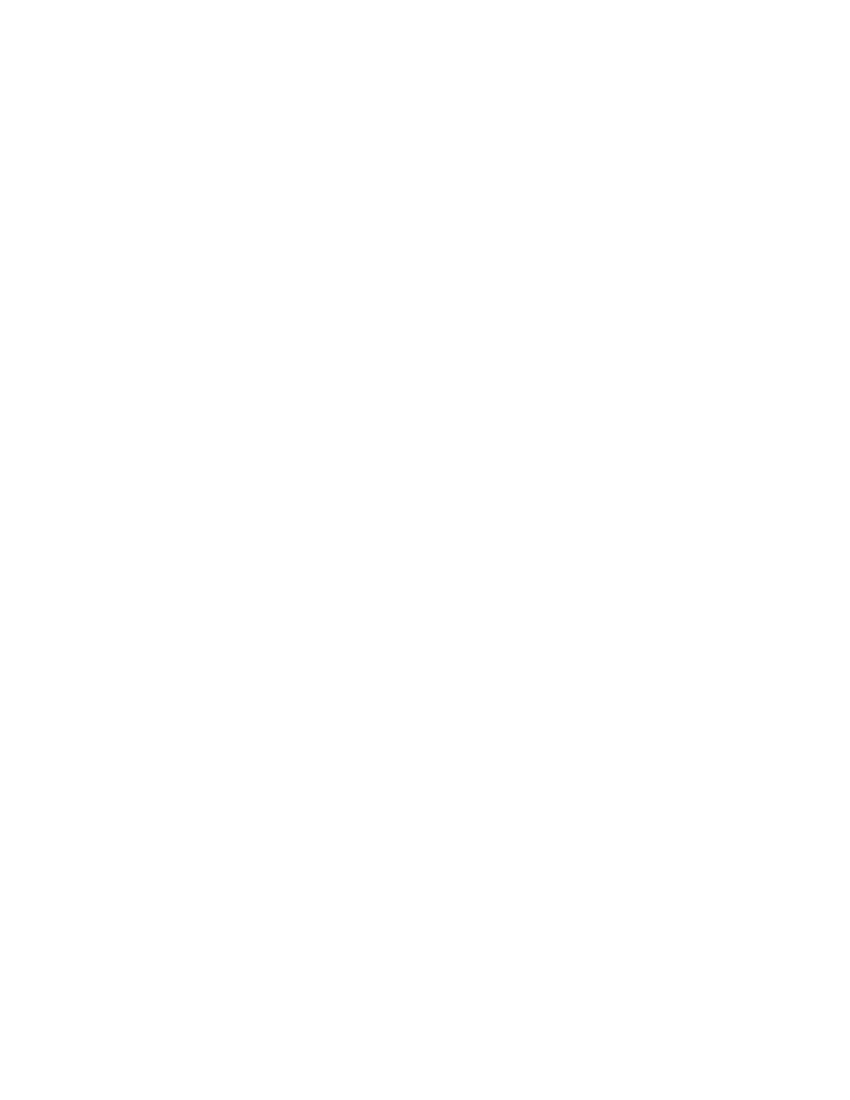

In [74]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import subjects
from subjects import sd_span, nsd_span, grp_span, lineplot_kw, errorbar_kw,boxplot_kw
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats
from statannotations.Annotator import Annotator

scatter_kw=dict(rasterized=True,s=12,edgecolors='w',linewidths=0.6,alpha=0.5)


grpdata = subjects.GroupData()
group = ['NSD','SD']

# EV of remaze on ZT0-5
ev_remaze = grpdata.remaze_ev_on_zt0to5
ev_remaze = ev_remaze[ev_remaze['ev_type']=='ev']
colors_ev = subjects.colors_sd(1.3)

corr_first5h_remaze =grpdata.remaze_first5_paircorr
colors_scatter= subjects.colors_sd(1.2)


fig = Fig(grid=(5, 4), hspace=0.5, wspace=0.5,fontsize=10)
filename = subjects.figpath_sd / "figure_incubator"
caption = ""


### paircorr first5h vs remaze

In [75]:

for i, grp in enumerate(['NSD','SD']):
    ax = fig.subplot(fig.gs[0,i])
    df = corr_first5h_remaze[corr_first5h_remaze['grp']==grp]
    linreg = stats.linregress(df['e1'],df['e2'])

    ax.scatter(df['e1'],df['e2'],c=colors_scatter[i],**scatter_kw)
    ax.plot(df['e1'],linreg.intercept + linreg.slope*df['e1'],'gray')
    ax.set_title(f'r={linreg.rvalue.round(2)}',loc='left')
    ax.set_xlim([-0.15,0.55])
    ax.set_ylim([-0.15,0.55])
    ax.set_xlabel('Zt0-5')
    ax.set_ylabel('Remaze')



### EV of remaze on Zt0-5 while controlling for PRE

In [76]:
ax = fig.subplot(fig.gs[2])
sns.boxplot(data=ev_remaze,x='grp',y='ev_value',palette=colors_ev,ax=ax,**boxplot_kw)

ax.legend('',frameon=False)
ax.set_ylabel('Explained variance')
ax.set_xlabel('')
ax.set_title('Remaze on Zt0-5')

Text(0.5, 1.0, 'Remaze on Zt0-5')

### saving

In [77]:
fig.savefig(filename)